<a href="https://colab.research.google.com/github/RASHMI1110/inevitables/blob/master/fods_lab_encode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
s = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', header = 0, na_values = ['?'], names=["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"])
s

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
200,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
201,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
202,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [ ]:
s.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [ ]:
d=s.select_dtypes(include=['object']).copy()
d

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
3,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
4,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
199,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
200,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
202,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [ ]:
d[d.isnull().any(axis=1)]

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
26,dodge,gas,turbo,NaN,sedan,fwd,front,ohc,four,mpfi
62,mazda,diesel,std,NaN,sedan,fwd,front,ohc,four,idi


In [ ]:
d["num_doors"].value_counts()

four    114
two      88
Name: num_doors, dtype: int64

In [ ]:
c={"num_doors": {"four": 4, "two": 2},
   "num_cylinders": {"four": 4,"six": 6, "five": 5,"eight": 8, "two": 2,"twelve": 12, "three": 3}}

In [ ]:
d.replace(c,inplace=True)
d.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,2.0,convertible,rwd,front,dohc,4,mpfi
1,alfa-romero,gas,std,2.0,hatchback,rwd,front,ohcv,6,mpfi
2,audi,gas,std,4.0,sedan,fwd,front,ohc,4,mpfi
3,audi,gas,std,4.0,sedan,4wd,front,ohc,5,mpfi
4,audi,gas,std,2.0,sedan,fwd,front,ohc,5,mpfi


In [ ]:
d['body_style']=d['body_style'].astype('category')
d.dtypes

make                 object
fuel_type            object
aspiration           object
num_doors           float64
body_style         category
drive_wheels         object
engine_location      object
engine_type          object
num_cylinders         int64
fuel_system          object
dtype: object

In [ ]:
d['body_style_cat']=d['body_style'].cat.codes
d.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system,body_style_cat
0,alfa-romero,gas,std,2.0,convertible,rwd,front,dohc,4,mpfi,0
1,alfa-romero,gas,std,2.0,hatchback,rwd,front,ohcv,6,mpfi,2
2,audi,gas,std,4.0,sedan,fwd,front,ohc,4,mpfi,3
3,audi,gas,std,4.0,sedan,4wd,front,ohc,5,mpfi,3
4,audi,gas,std,2.0,sedan,fwd,front,ohc,5,mpfi,3


In [ ]:
pd.get_dummies(d,columns=["drive_wheels"]).head()

,make,fuel_type,aspiration,num_doors,body_style,engine_location,engine_type,num_cylinders,fuel_system,body_style_cat,drive_wheels_4wd,drive_wheels_fwd,drive_wheels_rwd
0,alfa-romero,gas,std,2.0,convertible,front,dohc,4,mpfi,0,0,0,1
1,alfa-romero,gas,std,2.0,hatchback,front,ohcv,6,mpfi,2,0,0,1
2,audi,gas,std,4.0,sedan,front,ohc,4,mpfi,3,0,1,0
3,audi,gas,std,4.0,sedan,front,ohc,5,mpfi,3,1,0,0
4,audi,gas,std,2.0,sedan,front,ohc,5,mpfi,3,0,1,0


In [ ]:
pd.get_dummies(d,columns=["body_style","drive_wheels"],prefix=["body","drive"]).head()

,make,fuel_type,aspiration,num_doors,engine_location,engine_type,num_cylinders,fuel_system,body_style_cat,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_4wd,drive_fwd,drive_rwd
0,alfa-romero,gas,std,2.0,front,dohc,4,mpfi,0,1,0,0,0,0,0,0,1
1,alfa-romero,gas,std,2.0,front,ohcv,6,mpfi,2,0,0,1,0,0,0,0,1
2,audi,gas,std,4.0,front,ohc,4,mpfi,3,0,0,0,1,0,0,1,0
3,audi,gas,std,4.0,front,ohc,5,mpfi,3,0,0,0,1,0,1,0,0
4,audi,gas,std,2.0,front,ohc,5,mpfi,3,0,0,0,1,0,0,1,0


In [ ]:
d["engine_type"].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      11
rotor      4
dohcv      1
Name: engine_type, dtype: int64

In [ ]:
d["OHC_Code"]=np.where(d["engine_type"].str.contains("ohc"),1,0)

In [ ]:
d[["make","engine_type","OHC_Code"]].head()

,make,engine_type,OHC_Code
0,alfa-romero,dohc,1
1,alfa-romero,ohcv,1
2,audi,ohc,1
3,audi,ohc,1
4,audi,ohc,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb_make=LabelEncoder()
d["make_code"]=lb_make.fit_transform(d["make"])
d[["make","make_code"]].head(11)

,make,make_code
0,alfa-romero,0
1,alfa-romero,0
2,audi,1
3,audi,1
4,audi,1
5,audi,1
6,audi,1
7,audi,1
8,audi,1
9,bmw,2


In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb_s=LabelBinarizer()
lb_r=lb_s.fit_transform(d["body_style"])
pd.DataFrame(lb_r,columns=lb_s.classes_).head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [ ]:
p=pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/biopics/biopics.csv',encoding='latin-1')
p

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress
0,10 Rillington Place,http://www.imdb.com/title/tt0066730/,UK,1971,-,Richard Fleischer,1,John Christie,Criminal,Unknown,NaN,0,Male,Richard Attenborough
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,$56.7M,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,$18.3M,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco
3,1987,http://www.imdb.com/title/tt2833074/,Canada,2014,-,Ricardo Trogi,1,Ricardo Trogi,Other,Known,White,0,Male,Jean-Carl Boucher
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,$537K,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,Young Man with a Horn,http://www.imdb.com/title/tt0043153/,US,1950,-,Michael Curtiz,1,Bix Beiderbecke,Musician,Known,White,0,Male,Kirk Douglas
757,Young Mr. Lincoln,http://www.imdb.com/title/tt0032155/,US,1939,-,John Ford,1,Abraham Lincoln,World leader,Known,White,0,Male,Henry Fonda
758,Young Tom Edison,http://www.imdb.com/title/tt0033289/,US,1940,-,Norman Taurog,1,Thomas Edison,Other,Known,White,0,Male,Mickey Rooney
759,Young Winston,http://www.imdb.com/title/tt0069528/,US,1972,-,Richard Attenborough,1,Winston Churchill,World leader,Known,White,0,Male,Simon Ward


In [ ]:
p.dtypes

title                 object
site                  object
country               object
year_release           int64
box_office            object
director              object
number_of_subjects     int64
subject               object
type_of_subject       object
race_known            object
subject_race          object
person_of_color        int64
subject_sex           object
lead_actor_actress    object
dtype: object

In [ ]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               761 non-null    object
 1   site                761 non-null    object
 2   country             761 non-null    object
 3   year_release        761 non-null    int64 
 4   box_office          761 non-null    object
 5   director            761 non-null    object
 6   number_of_subjects  761 non-null    int64 
 7   subject             761 non-null    object
 8   type_of_subject     761 non-null    object
 9   race_known          761 non-null    object
 10  subject_race        564 non-null    object
 11  person_of_color     761 non-null    int64 
 12  subject_sex         761 non-null    object
 13  lead_actor_actress  754 non-null    object
dtypes: int64(3), object(11)
memory usage: 83.4+ KB


In [ ]:
len(p)

761

In [ ]:
d1=p.select_dtypes(include=['object']).copy()
d1

,title,site,country,box_office,director,subject,type_of_subject,race_known,subject_race,subject_sex,lead_actor_actress
0,10 Rillington Place,http://www.imdb.com/title/tt0066730/,UK,-,Richard Fleischer,John Christie,Criminal,Unknown,NaN,Male,Richard Attenborough
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,$56.7M,Steve McQueen,Solomon Northup,Other,Known,African American,Male,Chiwetel Ejiofor
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,$18.3M,Danny Boyle,Aron Ralston,Athlete,Unknown,NaN,Male,James Franco
3,1987,http://www.imdb.com/title/tt2833074/,Canada,-,Ricardo Trogi,Ricardo Trogi,Other,Known,White,Male,Jean-Carl Boucher
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,$537K,Myles Berkowitz,Myles Berkowitz,Other,Unknown,NaN,Male,Myles Berkowitz
...,...,...,...,...,...,...,...,...,...,...,...
756,Young Man with a Horn,http://www.imdb.com/title/tt0043153/,US,-,Michael Curtiz,Bix Beiderbecke,Musician,Known,White,Male,Kirk Douglas
757,Young Mr. Lincoln,http://www.imdb.com/title/tt0032155/,US,-,John Ford,Abraham Lincoln,World leader,Known,White,Male,Henry Fonda
758,Young Tom Edison,http://www.imdb.com/title/tt0033289/,US,-,Norman Taurog,Thomas Edison,Other,Known,White,Male,Mickey Rooney
759,Young Winston,http://www.imdb.com/title/tt0069528/,US,-,Richard Attenborough,Winston Churchill,World leader,Known,White,Male,Simon Ward


In [ ]:
d1["title"].value_counts()

Jersey Boys             4
The Bang Bang Club      4
Escape from Alcatraz    3
Devil's Knot            3
Cadillac Records        3
                       ..
Low Down                1
Raging Bull             1
The Pianist             1
Lovelace                1
The King's Speech       1
Name: title, Length: 668, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb1_make=LabelEncoder()
d1["race_known1"]=lb1_make.fit_transform(d1["race_known"])
d1[["race_known","race_known1"]].head(11)

,race_known,race_known1
0,Unknown,1
1,Known,0
2,Unknown,1
3,Known,0
4,Unknown,1
5,Known,0
6,Known,0
7,Known,0
8,Unknown,1
9,Unknown,1


In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb1_s=LabelBinarizer()
lb1_r=lb1_s.fit_transform(d1["type_of_subject"])
pd.DataFrame(lb1_r,columns=lb1_s.classes_).head()

,Academic,Academic (Philosopher),Activist,Actor,Actress,Actress,Actress / activist,Artist,Athlete,Athlete / military,Author,Author (poet),Comedian,Criminal,Government,Historical,Journalist,Media,Medicine,Military,Military / activist,Musician,Other,Politician,Singer,Teacher,World leader
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb1_make=LabelEncoder()
d1["subject_sex1"]=lb1_make.fit_transform(d1["subject_sex"])
d1[["subject_sex","subject_sex1"]].head(11)

,subject_sex,subject_sex1
0,Male,1
1,Male,1
2,Male,1
3,Male,1
4,Male,1
5,Male,1
6,Male,1
7,Male,1
8,Male,1
9,Male,1


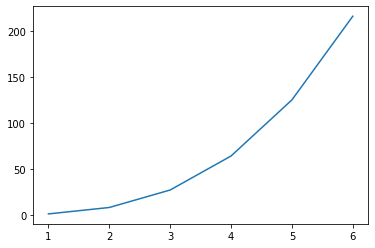

In [ ]:
x=np.array([1,2,3,4,5,6])
y=np.power(x,3)
plt.plot(x,y)
plt.show()

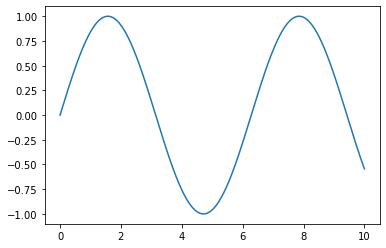

In [ ]:
x=np.linspace(0,10,1000)
y=np.sin(x)
plt.plot(x,y)
plt.show()

In [ ]:
mpl.rcParams.update(mpl.rcParamsDefault)

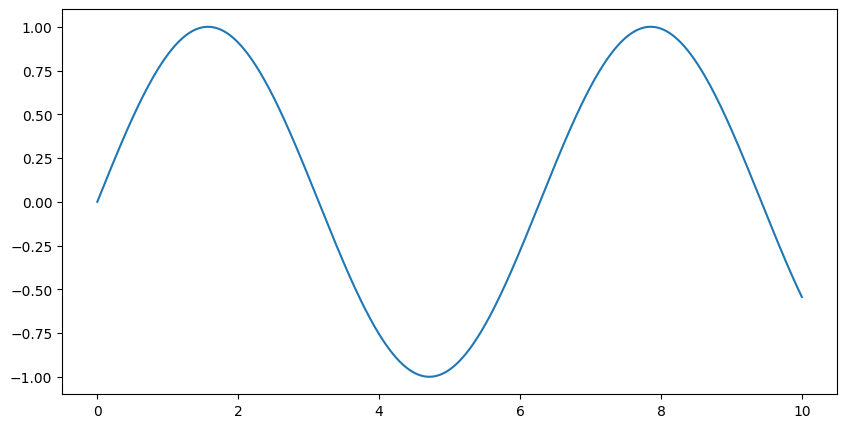

In [ ]:
plt.figure(figsize=(10,5))
x=np.linspace(0,10,1000)
y=np.sin(x)
plt.plot(x,y)
plt.show()

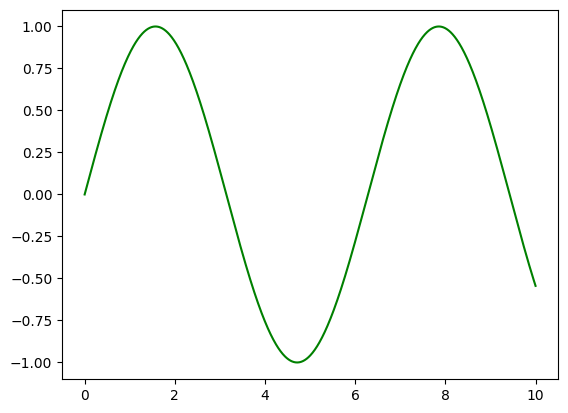

Text(0, 0.5, ' y axis')

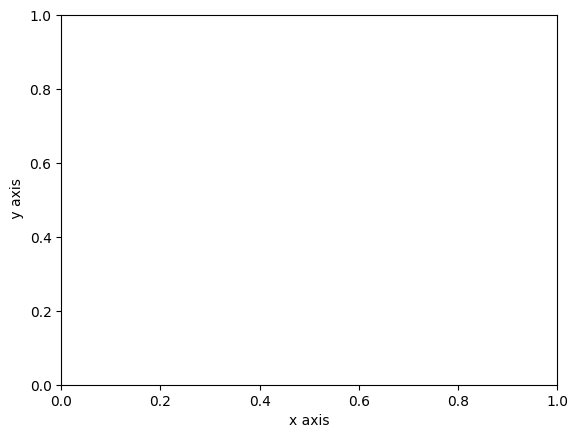

In [ ]:
x=np.linspace(0,10,1000)
y=np.sin(x)
plt.plot(x,y,'g-')
plt.show()
plt.xlabel("x axis")
plt.ylabel(" y axis")

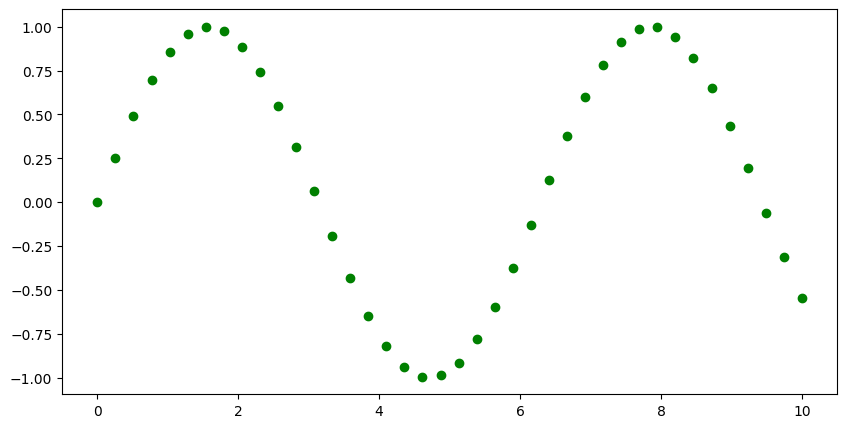

Text(0, 0.5, ' y axis')

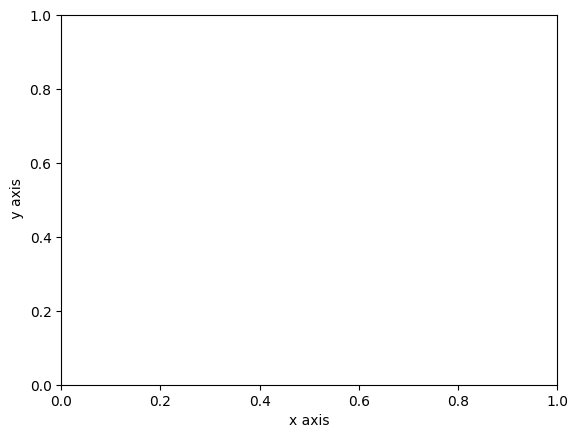

In [ ]:

plt.figure(figsize=(10,5))
x=np.linspace(0,10,40)

y=np.sin(x)
plt.plot(x,y,'go')
plt.show()
plt.xlabel("x axis")
plt.ylabel(" y axis")

In [ ]:
plt.figure(figsize=(10,5))
x=np.array([1,2,3,4,5,6])
y1=np.power(x,)

y=np.sin(x)
plt.plot(x,y,'go')
plt.show()
plt.xlabel("x axis")
plt.ylabel(" y axis")

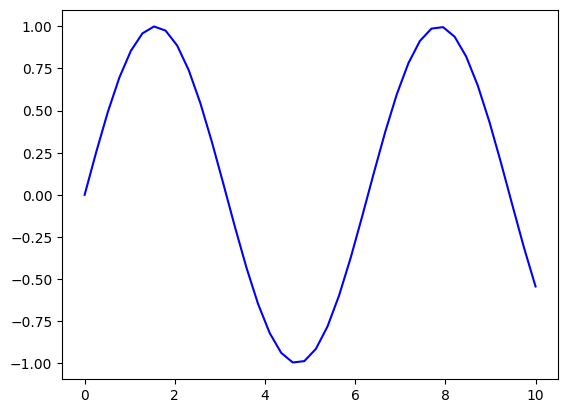

In [ ]:
plt.plot(x, np.sin(x - 0), color='blue')

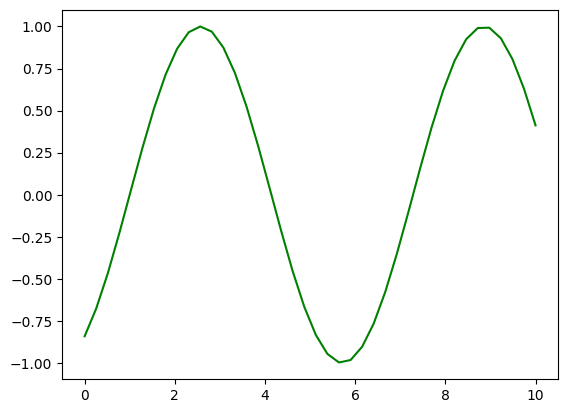

In [ ]:
plt.plot(x, np.sin(x - 1), color='g')

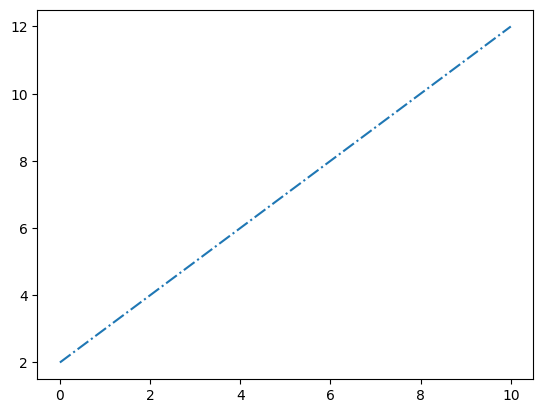

In [ ]:
plt.plot(x, x + 2, linestyle='dashdot')

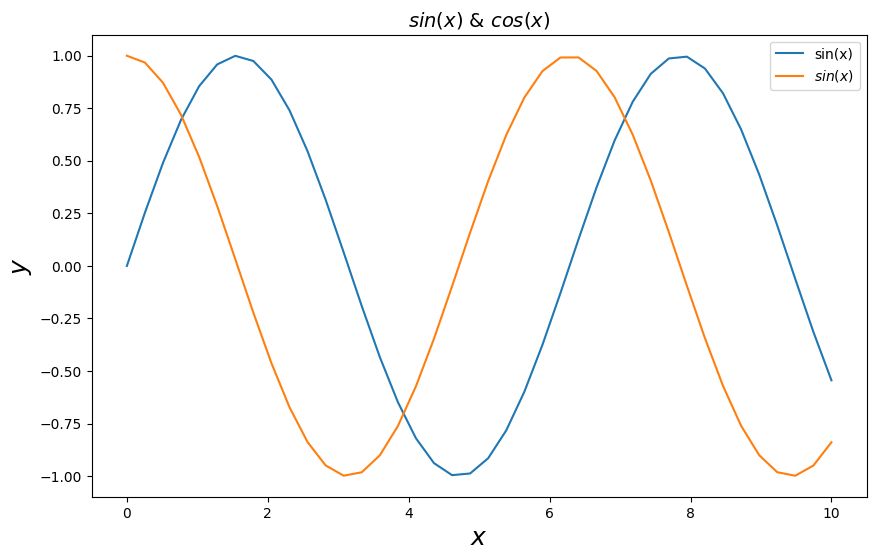

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x,np.sin(x),label='sin(x)')
plt.plot(x,np.cos(x),label='$sin(x)$')
plt.xlabel(r'$x$',fontsize=18)
plt.ylabel(r'$y$',fontsize=18)
plt.title("$sin(x) $ $ & $ $ cos(x)$",fontsize=14)
plt.legend(loc='upper right')
plt.show()

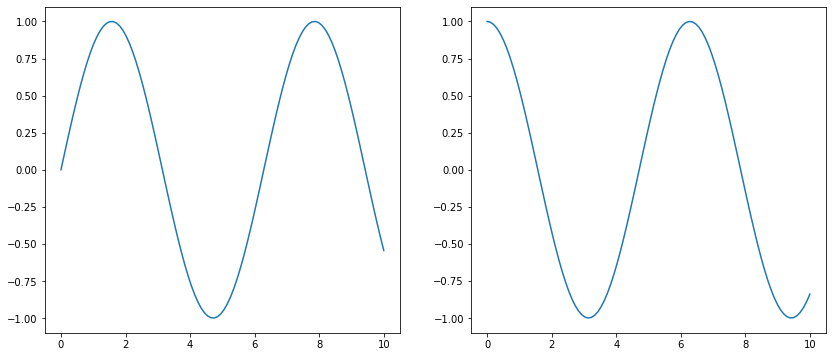

In [ ]:


# Display multiple plots in one figure (1 row & 2 columns)
plt.figure(figsize=(14,6))
x = np.linspace(0, 10, 100) 
y1 = np.sin(x) # Sine Graph
y2 = np.cos(x) # cosine graph
plt.subplot(1,2,1)
plt.plot(x,y1)
plt.subplot(1,2,2)
plt.plot(x,y2)
plt.show()

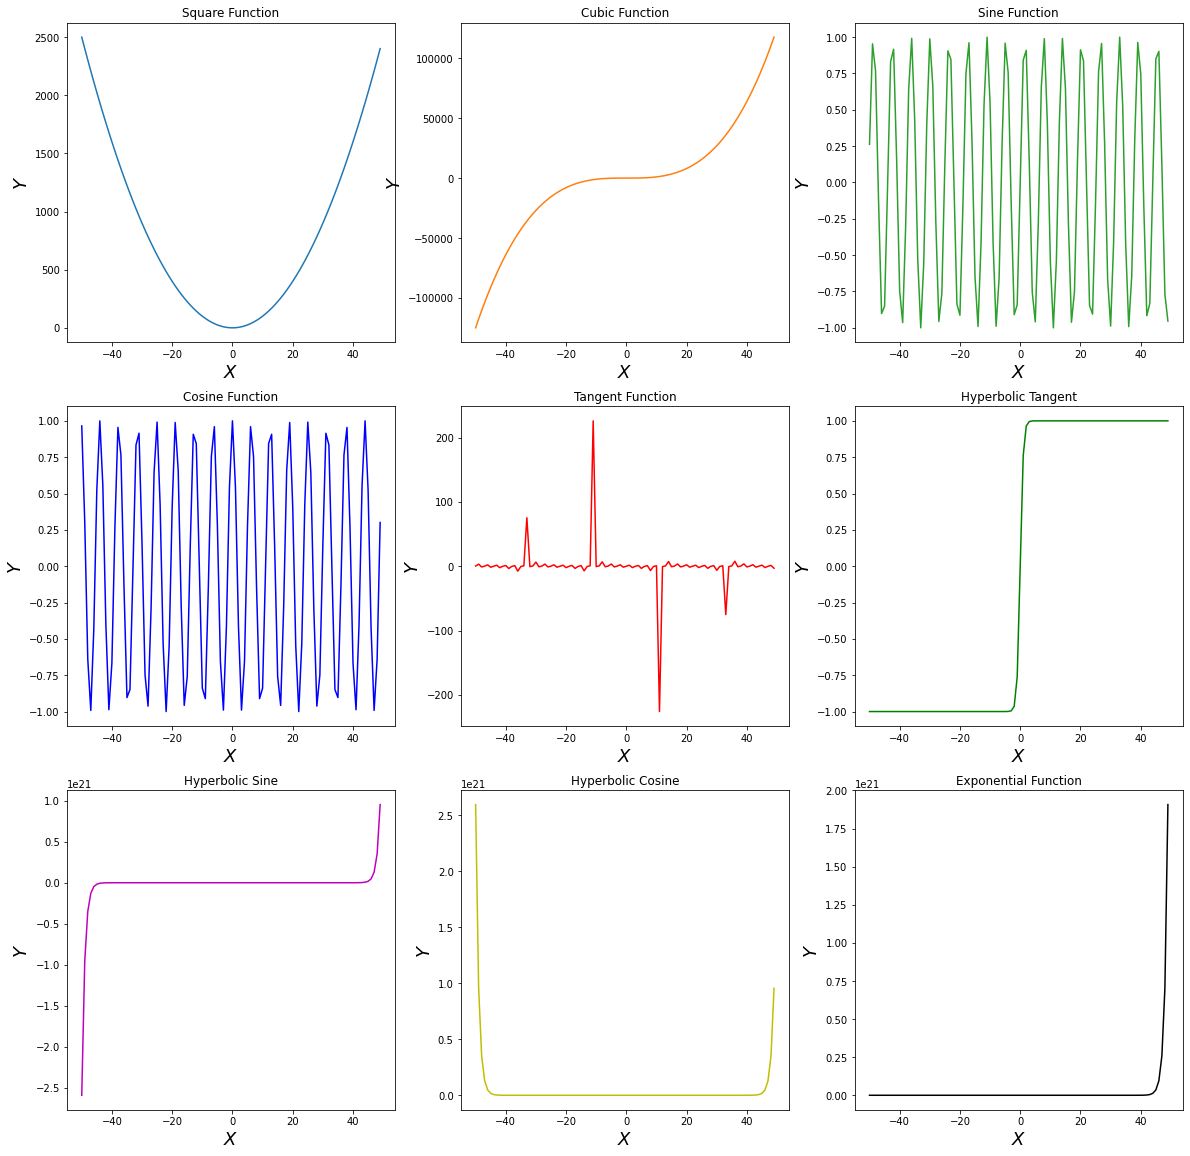

In [ ]:
# # Display multiple plots in one figure using subplots()
x = np.arange(-50,50)
y1 = np.power(x,2)
y2 = np.power(x,3)
y3 = np.sin(x)
y4 = np.cos(x)
y5 = np.tan(x)
y6 = np.tanh(x)
y7 = np.sinh(x)
y8 = np.cosh(x)
y9 = np.exp(x)
 
fig1 , ax1 = plt.subplots(nrows=3,ncols=3 , figsize = (20,20)) # Create a figure and subplots
ax1[0,0].plot(x,y1,"tab:blue") # set the color of the line chart
ax1[0,0].set_title("Square Function") # setting title of subplot
ax1[0,0].set_xlabel(r'$X$' , fontsize = 18) #Set the label for the x-axis
ax1[0,0].set_ylabel(r'$Y$' , fontsize = 18) #Set the label for the y-axis
 
ax1[0,1].plot(x,y2,"tab:orange")
ax1[0,1].set_title("Cubic Function")
ax1[0,1].set_xlabel(r'$X$' , fontsize = 18)
ax1[0,1].set_ylabel(r'$Y$' , fontsize = 18)
 
ax1[0,2].plot(x,y3,"tab:green")
ax1[0,2].set_title("Sine Function")
ax1[0,2].set_xlabel(r'$X$' , fontsize = 18)
ax1[0,2].set_ylabel(r'$Y$' , fontsize = 18)
 
ax1[1,0].plot(x,y4,"b-")
ax1[1,0].set_title("Cosine Function")
ax1[1,0].set_xlabel(r'$X$' , fontsize = 18)
ax1[1,0].set_ylabel(r'$Y$' , fontsize = 18)
 
ax1[1,1].plot(x,y5,"r-")
ax1[1,1].set_title("Tangent Function")
ax1[1,1].set_xlabel(r'$X$' , fontsize = 18)
ax1[1,1].set_ylabel(r'$Y$' , fontsize = 18)
 
ax1[1,2].plot(x,y6,"g-")
ax1[1,2].set_title("Hyperbolic Tangent")
ax1[1,2].set_xlabel(r'$X$' , fontsize = 18)
ax1[1,2].set_ylabel(r'$Y$' , fontsize = 18)
 
ax1[2,0].plot(x,y7,"m-")
ax1[2,0].set_title("Hyperbolic Sine")
ax1[2,0].set_xlabel(r'$X$' , fontsize = 18)
ax1[2,0].set_ylabel(r'$Y$' , fontsize = 18)
 
ax1[2,1].plot(x,y8,"y-")
ax1[2,1].set_title("Hyperbolic Cosine")
ax1[2,1].set_xlabel(r'$X$' , fontsize = 18)
ax1[2,1].set_ylabel(r'$Y$' , fontsize = 18)
 
ax1[2,2].plot(x,y9,"k-")
ax1[2,2].set_title("Exponential Function")
ax1[2,2].set_xlabel(r'$X$' , fontsize = 18)
ax1[2,2].set_ylabel(r'$Y$' , fontsize = 18)
 
plt.show()

In [ ]:
col1 = np.linspace(0, 10, 1000)
col2 = np.sin(col1)
df = pd.DataFrame({"C1" : col1 , "C2" :col2})
df.head(10)

,C1,C2
0,0.00000,0.000000
1,0.01001,0.010010
2,0.02002,0.020019
3,0.03003,0.030026
4,0.04004,0.040029
5,0.05005,0.050029
6,0.06006,0.060024
7,0.07007,0.070013
8,0.08008,0.079995
9,0.09009,0.089968


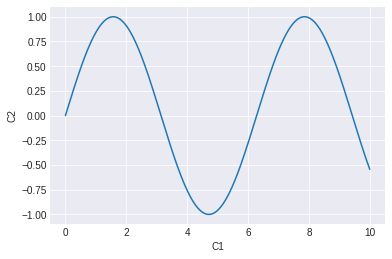

In [ ]:
plt.style.use('seaborn-darkgrid')
%matplotlib inline
sns.lineplot(x=df.C1,y=df.C2,data=df)
plt.show()

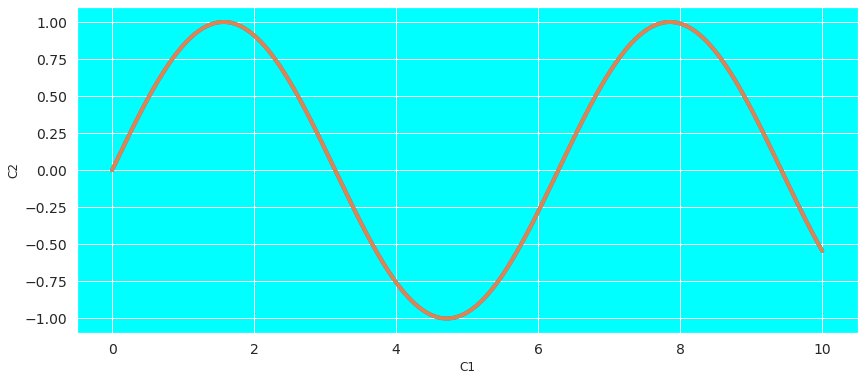

In [ ]:
plt.figure(figsize=(14,6))
sns.set(rc={"axes.facecolor":"cyan","axes.grid":True,'xtick.labelsize':14,'ytick.labelsize':14})
sns.lineplot(x=df.C1,y=df.C2,data=df,linewidth=4)
sns.lineplot(x=df.C1,y=df.C2,data=df,linewidth=4)
plt.show()


In [ ]:
s=pd.read_csv('spotify.csv',index_col="Date")
s

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
Date,,,,,
2017-01-06,12287078,NaN,NaN,NaN,NaN
2017-01-07,13190270,NaN,NaN,NaN,NaN
2017-01-08,13099919,NaN,NaN,NaN,NaN
2017-01-09,14506351,NaN,NaN,NaN,NaN
2017-01-10,14275628,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2018-01-05,4492978,3450315.0,2408365.0,2685857.0,2869783.0
2018-01-06,4416476,3394284.0,2188035.0,2559044.0,2743748.0
2018-01-07,4009104,3020789.0,1908129.0,2350985.0,2441045.0


In [ ]:
s.index=pd.to_datetime(s.index)

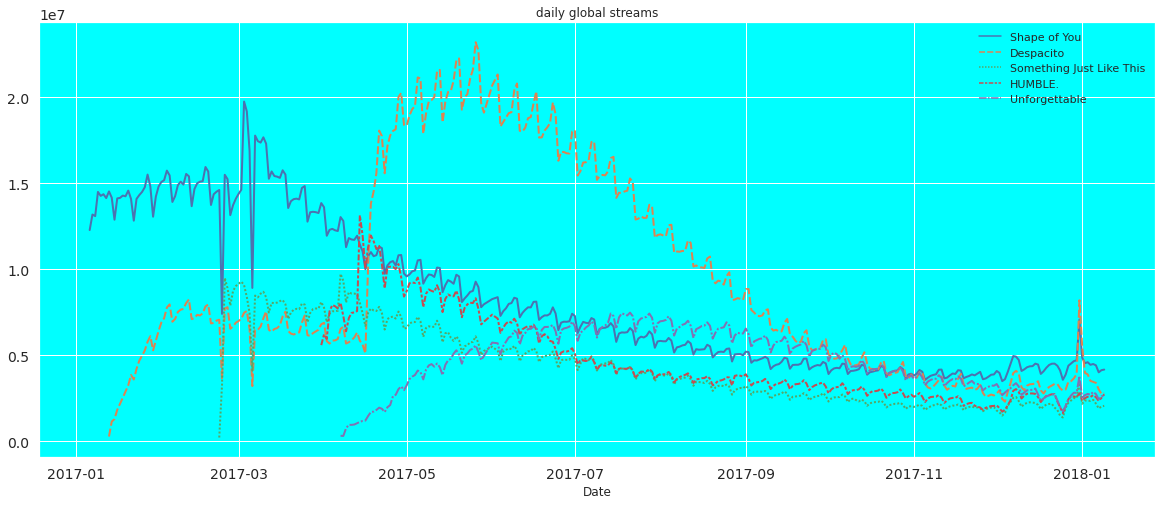

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=s,linewidth=2)
plt.title("daily global streams")
plt.show()

In [ ]:
r=pd.read_excel('unemployment.xlsx')
r

,Age,Gender,Period,Unemployed
0,16 to 19 years,Men,2005-01-01,91000
1,20 to 24 years,Men,2005-01-01,175000
2,25 to 34 years,Men,2005-01-01,194000
3,35 to 44 years,Men,2005-01-01,201000
4,45 to 54 years,Men,2005-01-01,207000
...,...,...,...,...
1703,25 to 34 years,Women,2015-02-01,294000
1704,35 to 44 years,Women,2015-02-01,235000
1705,45 to 54 years,Women,2015-02-01,253000
1706,55 to 64 years,Women,2015-02-01,170000


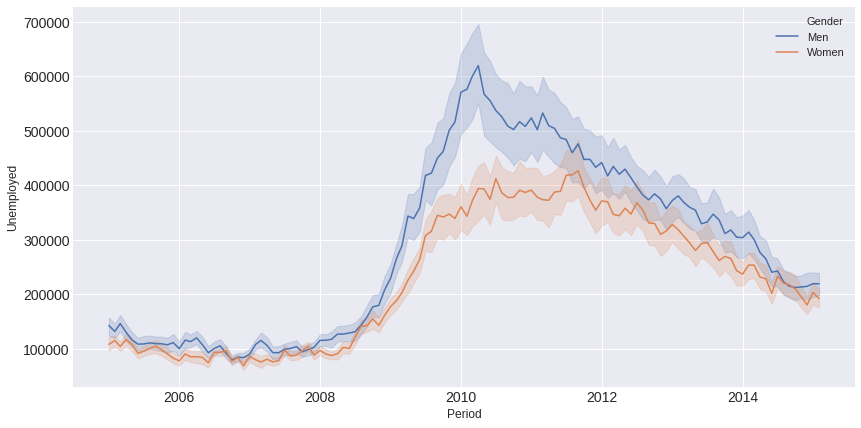

In [ ]:
plt.figure(figsize=(14,7))
plt.style.use('seaborn-darkgrid')
sns.lineplot(x="Period",y="Unemployed",hue="Gender",data=r,ci=50)
plt.show()

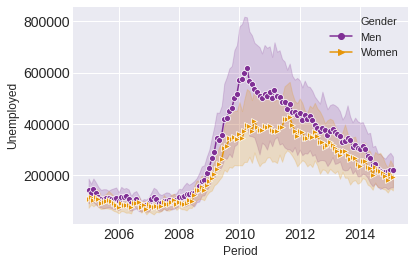

In [ ]:
sns.lineplot(x="Period",y="Unemployed",hue="Gender",data=r,style="Gender",dashes=False,palette='CMRmap',markers=["o",">"])
plt.show()

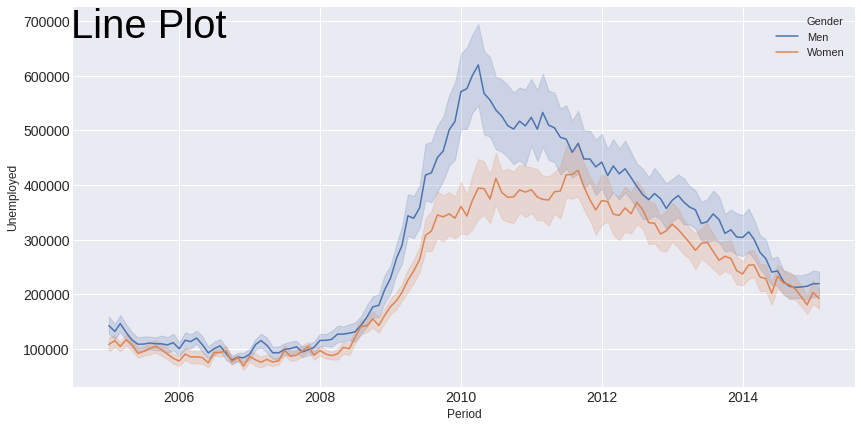

In [ ]:
plt.figure(figsize=(14,7))
plt.style.use('seaborn-darkgrid')
plt.gcf().text(.2, .84,"Line Plot",fontsize=40,color='Black',ha='center',va='center')
sns.lineplot(x="Period",y="Unemployed",hue="Gender",data=r,ci=50)
plt.show()

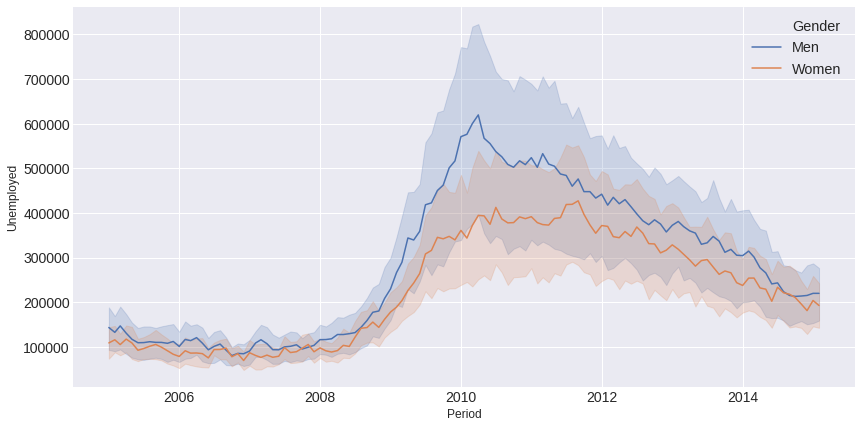

In [ ]:
plt.figure(figsize=(14,7))
plt.style.use('seaborn-darkgrid')
sns.lineplot(x="Period",y="Unemployed",hue="Gender",data=r,markers=True)
plt.legend(bbox_to_anchor=(1.0,1.0),shadow=True,fontsize='large')
plt.show()

<Figure size 720x720 with 0 Axes>

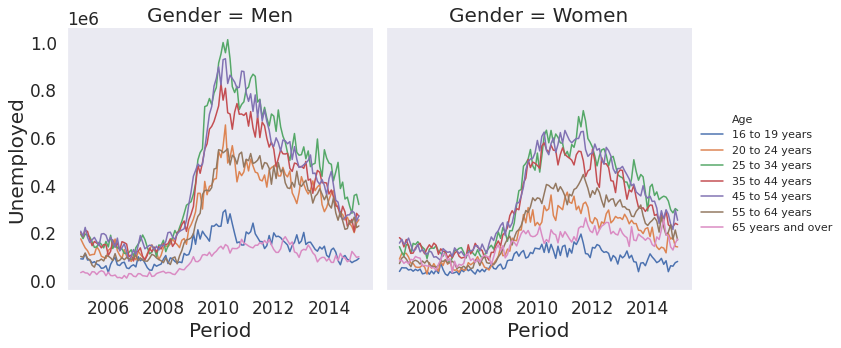

In [ ]:
plt.figure(figsize=(10,10))
sns.set(rc={'xtick.labelsize':17,'axes.labelsize':20,'ytick.labelsize':17,"axes.grid":False})
sns.relplot(x="Period",y="Unemployed",hue="Age",col="Gender",kind='line',data=r)
plt.show()

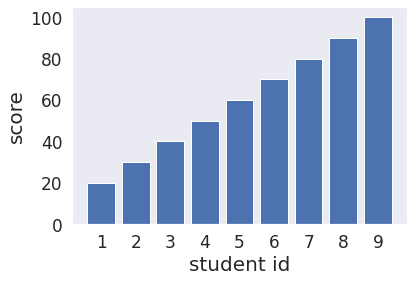

In [ ]:
id1=np.arange(1,10)
score=np.arange(20,110,10)
plt.bar(id1,score)
plt.xticks(id1)
plt.xlabel('student id')
plt.ylabel('score')
plt.show()

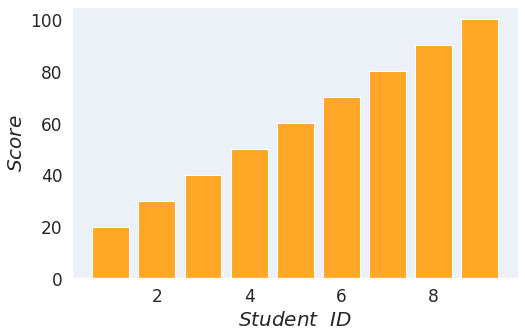

In [ ]:
id1=np.arange(1,10)
score=np.arange(20,110,10)
plt.figure(figsize=(8,5))
ax=plt.axes()
ax.set_facecolor("#ECF0F7")
plt.bar(id1,score,color="#FFA726")
plt.xlabel(r'$Student $  $ ID$')
plt.ylabel(r'$Score$')
plt.show()

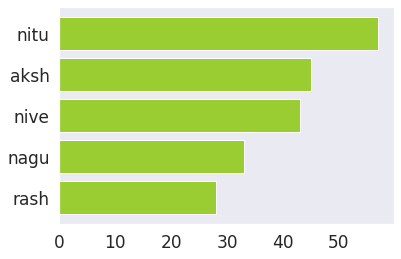

In [ ]:
Age=[28,33,43,45,57]
Name=["rash","nagu","nive","aksh","nitu"]
plt.barh(Name,Age,color="yellowgreen")
plt.show()

[]

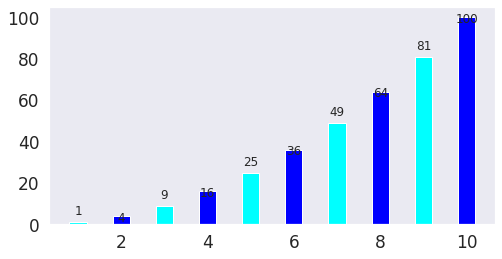

In [ ]:
n1=np.array([1,3,5,7,9])
n2=np.array([2,4,6,8,10])
plt.figure(figsize=(8,4))
plt.bar(n1,n1**2,width=0.4,color="cyan")
for x,y in zip(n1,n1**2):
   plt.text(x,y+2,'%d' %y,ha='center',va='bottom')
for x,y in zip(n2,n2**2):
    plt.text(x,y-4 ,'%d' %y,ha='center',va='bottom')
plt.bar(n2,n2**2,width=0.4,color="blue")
plt.plot()

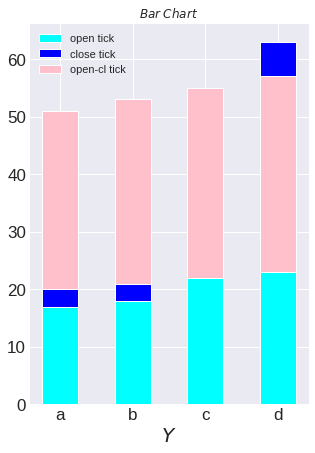

In [ ]:
plt.style.use('seaborn-darkgrid')
x1=['a','b','c','d']
y1=[17,18,29,40]
y2=[20,21,22,23]
y3=[31,32,33,34]
plt.figure(figsize=(5,7))

plt.bar(x1,y1,label="open tick",width=0.5,color='cyan')
plt.bar(x1,y2,label="close tick",width=0.5,bottom=y1,color='blue')
plt.bar(x1,y3,label="open-cl tick",width=0.5,bottom=y2,color='pink')
plt.xlabel('$X$')
plt.xlabel('$Y$')
plt.title('$Bar $ $ Chart$')
plt.legend()
plt.show()

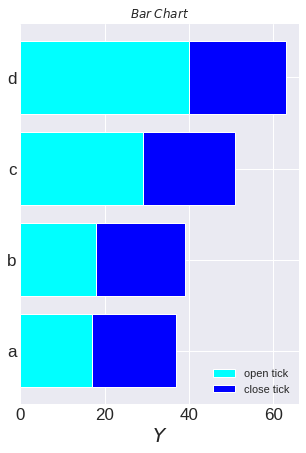

In [ ]:
plt.style.use('seaborn-darkgrid')
x1=['a','b','c','d']
y1=[17,18,29,40]
y2=[20,21,22,23]

plt.figure(figsize=(5,7))

plt.barh(x1,y1,label="open tick",color='cyan')
plt.barh(x1,y2,label="close tick",left=y1,color='blue')

plt.xlabel('$X$')
plt.xlabel('$Y$')
plt.title('$Bar $ $ Chart$')
plt.legend()
plt.show()

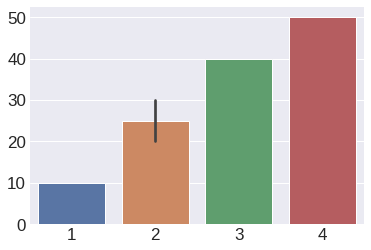

In [ ]:
x1=[1,2,2,3,4]
y1=[10,20,30,40,50]
sns.barplot(x=x1,y=y1)
plt.show()

In [ ]:
p=pd.read_csv('pokemon_updated.csv')
p

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,680


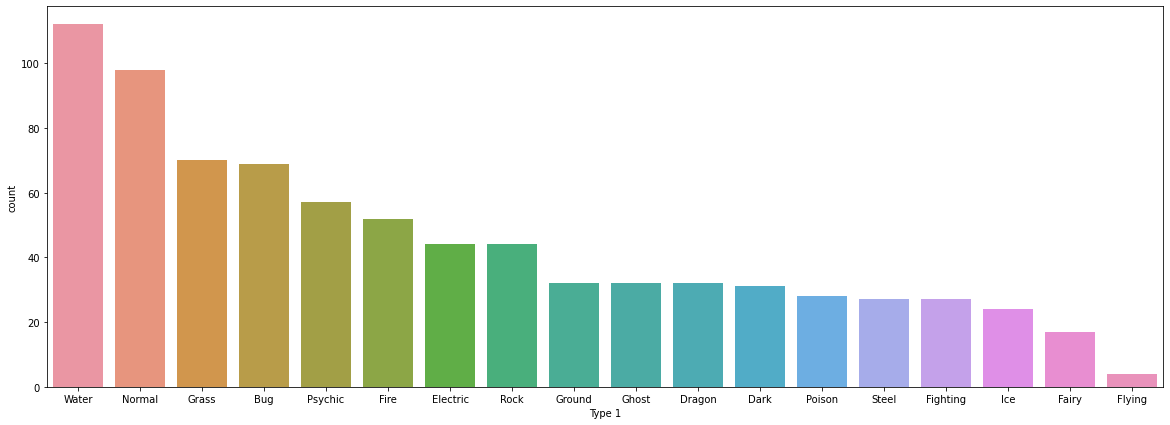

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(x=p['Type 1'],order=p['Type 1'].value_counts().index)
plt.show()

In [ ]:
x1=np.array([20,30,40,50,60])
y1=np.array([200,300,400,500,600])
plt.scatter(x1,y1,label='class 1')
plt

In [ ]:
st=pd.read_csv('housing.csv')
st

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
import seaborn as sns

In [ ]:
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

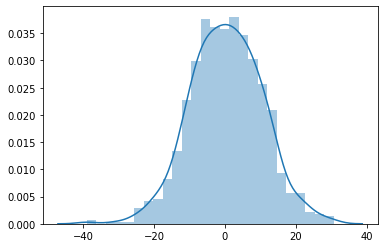

In [ ]:
num=np.random.normal(1,10,1000)
sns.distplot(num)
plt.show()

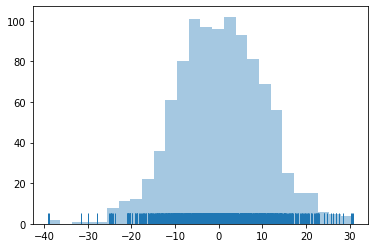

In [ ]:
sns.distplot(num,kde=False,rug=True)
plt.show()

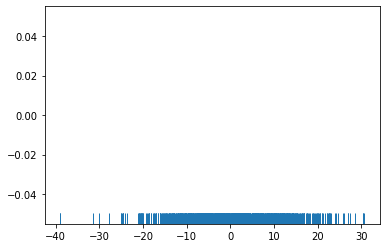

In [ ]:
sns.distplot(num,kde=False,rug=True,hist=False)
plt.show()

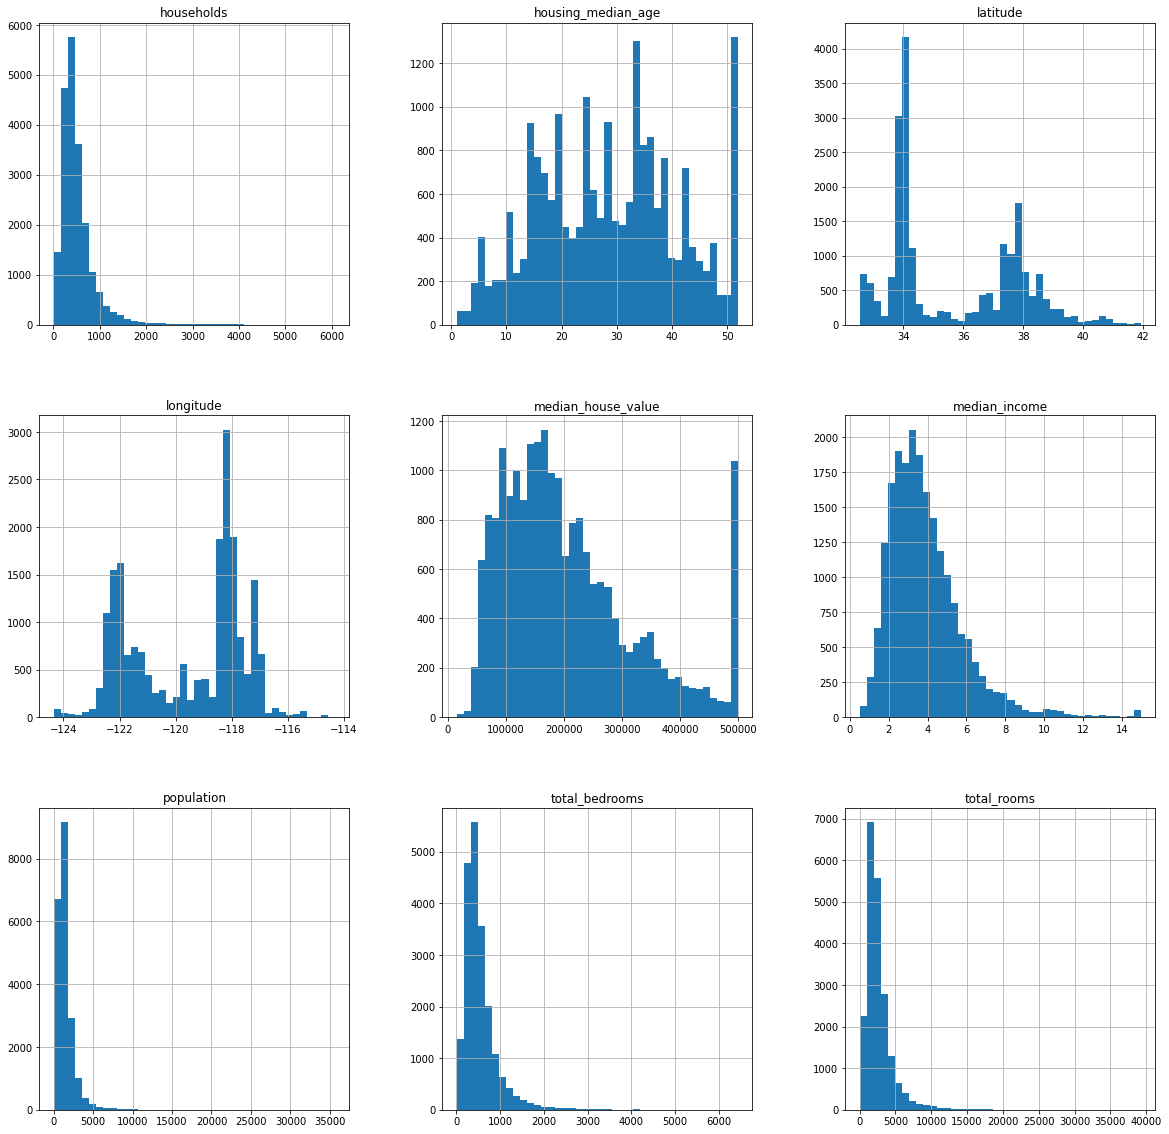

In [ ]:
st.hist(bins=40 , figsize=(20,20))
plt.show()

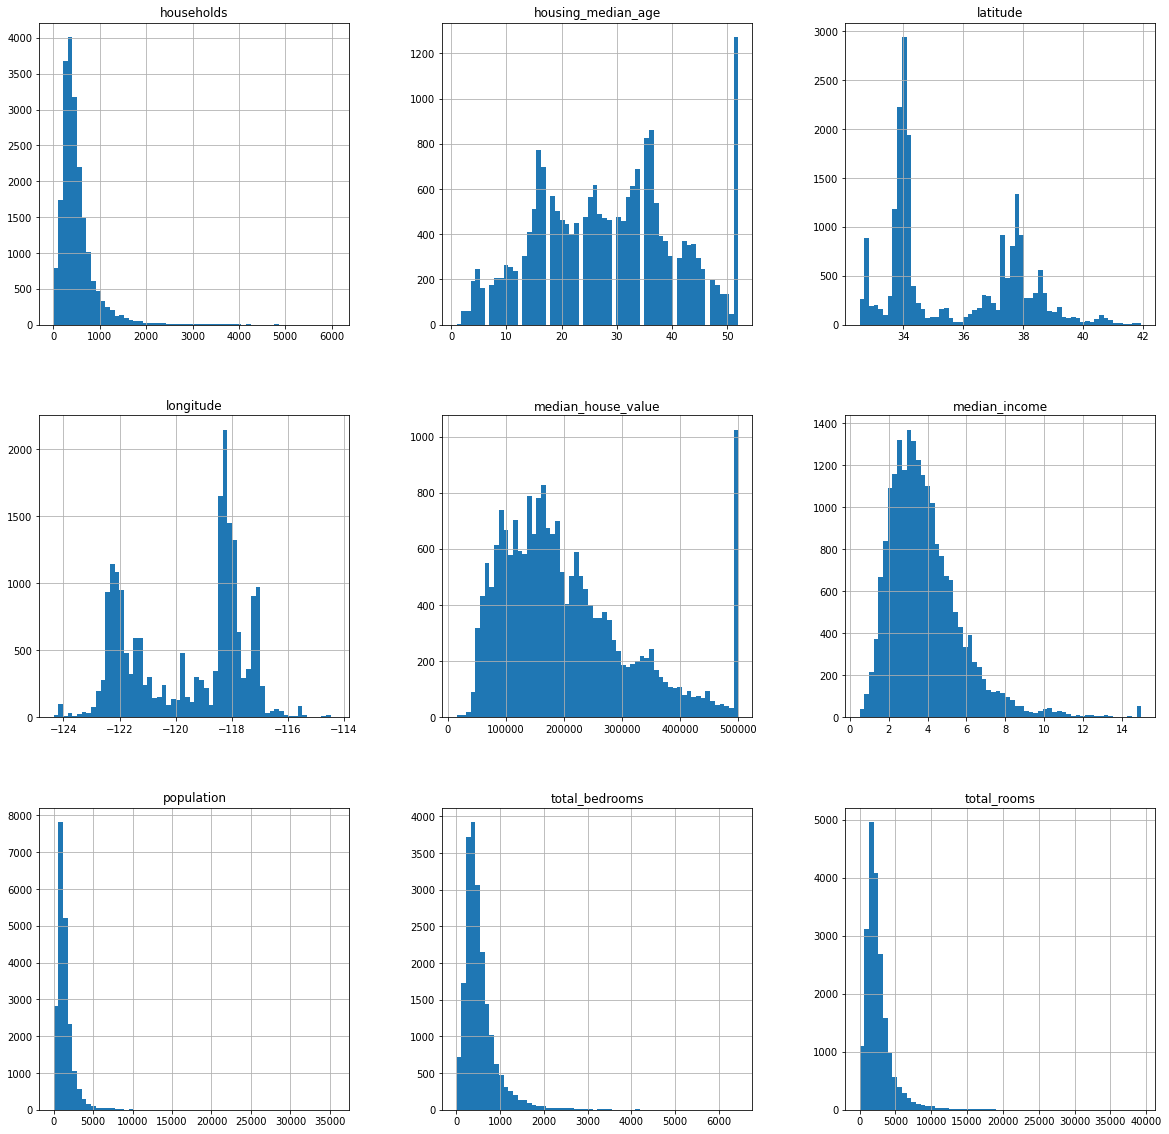

In [ ]:
st.hist(bins=60 , figsize=(20,20))
plt.show()                                    #increasng bin size-more near to data

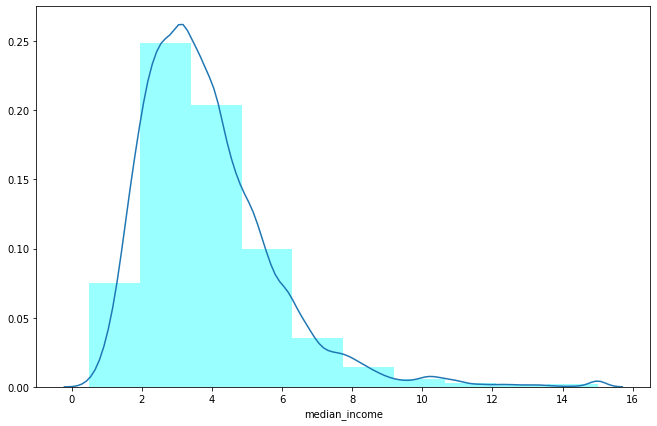

In [ ]:
plt.figure(figsize=(11,7))
sns.distplot(st["median_income"],bins=10,hist_kws=dict(color = "cyan",linewidth=2))
plt.show()

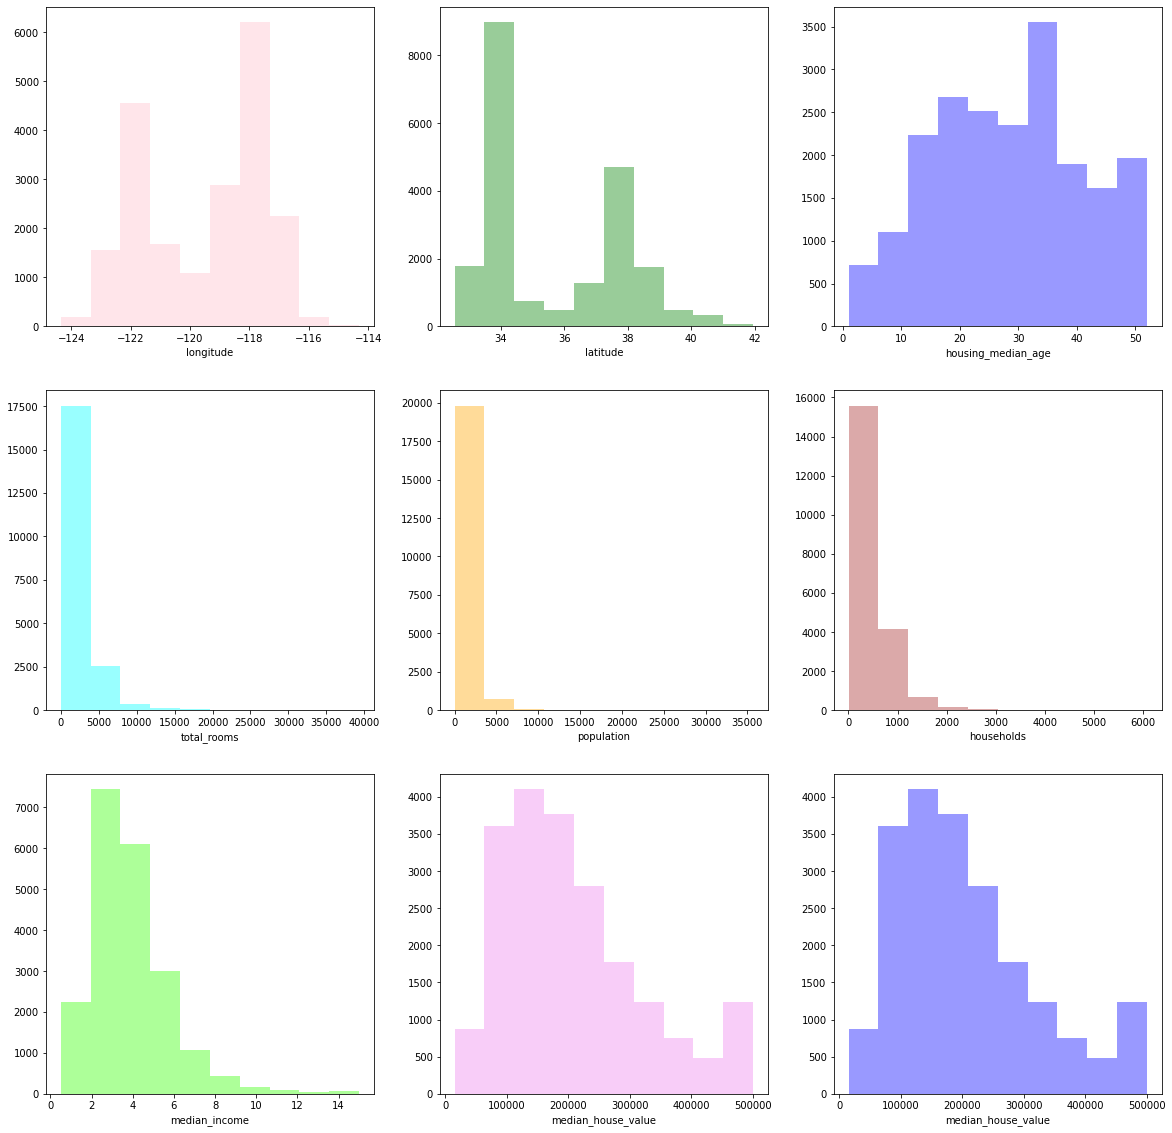

In [ ]:
fig1,axes= plt.subplots(nrows=3,ncols=3,figsize=(20,20))
sns.distplot(st['longitude'],color="pink",ax=axes[0,0],kde=False,bins=10)
sns.distplot(st['latitude'],color="green",ax=axes[0,1],kde=False,bins=10)
sns.distplot(st['housing_median_age'],color="blue",ax=axes[0,2],kde=False,bins=10)
sns.distplot(st['total_rooms'],color="cyan",ax=axes[1,0],kde=False,bins=10)
sns.distplot(st['population'],color="orange",ax=axes[1,1],kde=False,bins=10)
sns.distplot(st['households'],color="brown",ax=axes[1,2],kde=False,bins=10)
sns.distplot(st['median_income'],color="#33FF00",ax=axes[2,0],kde=False,bins=10)
sns.distplot(st['median_house_value'],color="violet",ax=axes[2,1],kde=False,bins=10)
sns.distplot(st['median_house_value'],color="blue",ax=axes[2,2],kde=False,bins=10)

In [ ]:
t=pd.read_csv('insurance.csv')
t

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


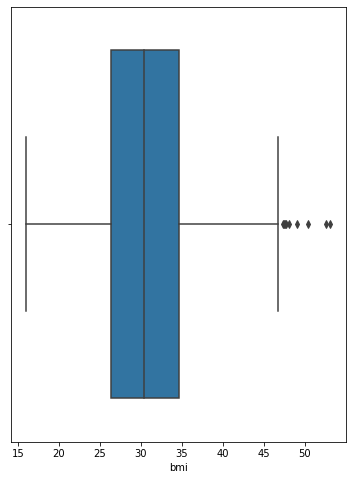

In [ ]:
plt.figure(figsize=(6,8))
sns.boxplot(x=t.bmi)
                                   #non overplotting-non overplottng-categorical

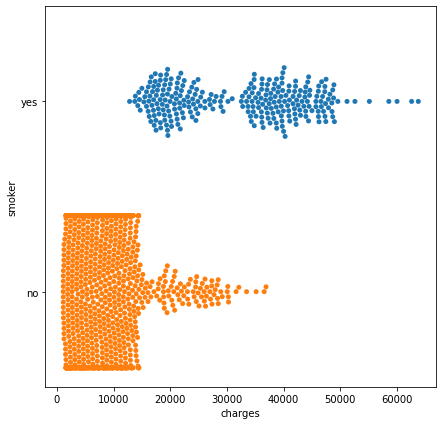

In [ ]:
plt.figure(figsize=(7,7))
sns.swarmplot(x=t.charges,y=t.smoker)
plt.show()   

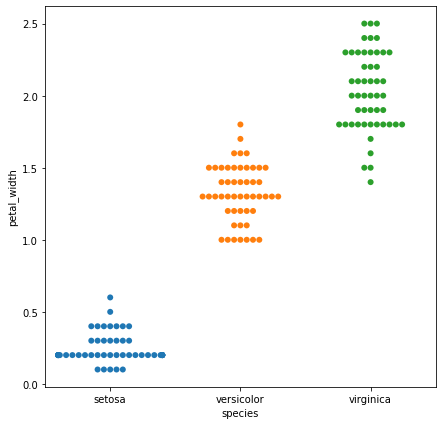

In [ ]:
iris=sns.load_dataset("iris")
plt.figure(figsize=(7,7))
sns.swarmplot(x="species",y="petal_width",data=iris,size=6)
plt.show()

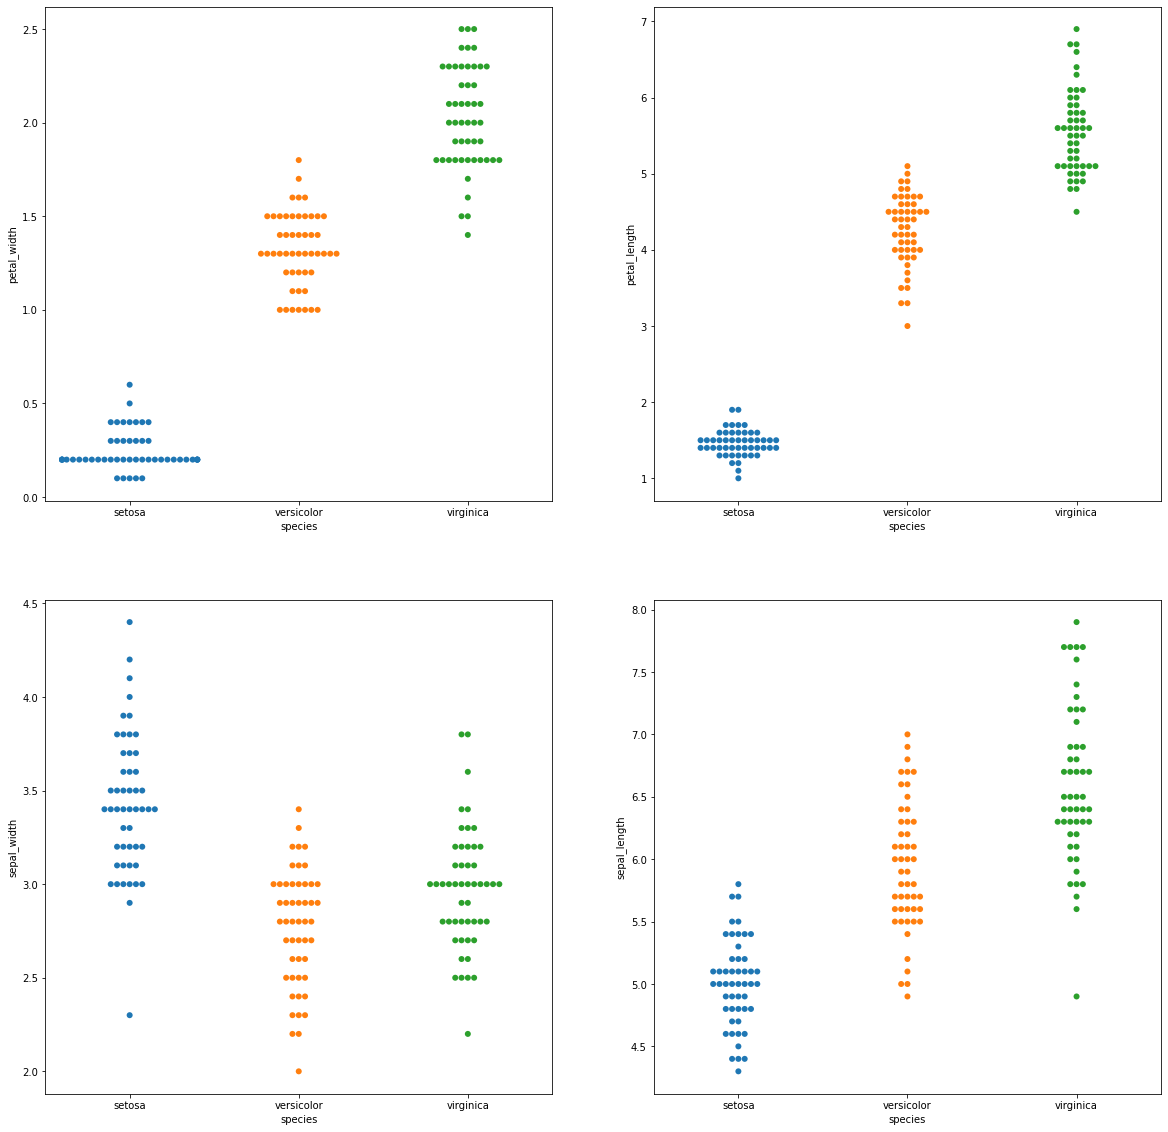

In [ ]:
fig1,axes= plt.subplots(nrows=2,ncols=2,figsize=(20,20))
sns.swarmplot(x="species",y="petal_width",ax=axes[0,0],data=iris,size=6)
sns.swarmplot(x="species",y="petal_length",ax=axes[0,1],data=iris,size=6)
sns.swarmplot(x="species",y="sepal_width",ax=axes[1,0],data=iris,size=6)
sns.swarmplot(x="species",y="sepal_length",ax=axes[1,1],data=iris,size=6)


In [ ]:
d=pd.read_csv("Fish.csv")
d.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


ValueError: ignored

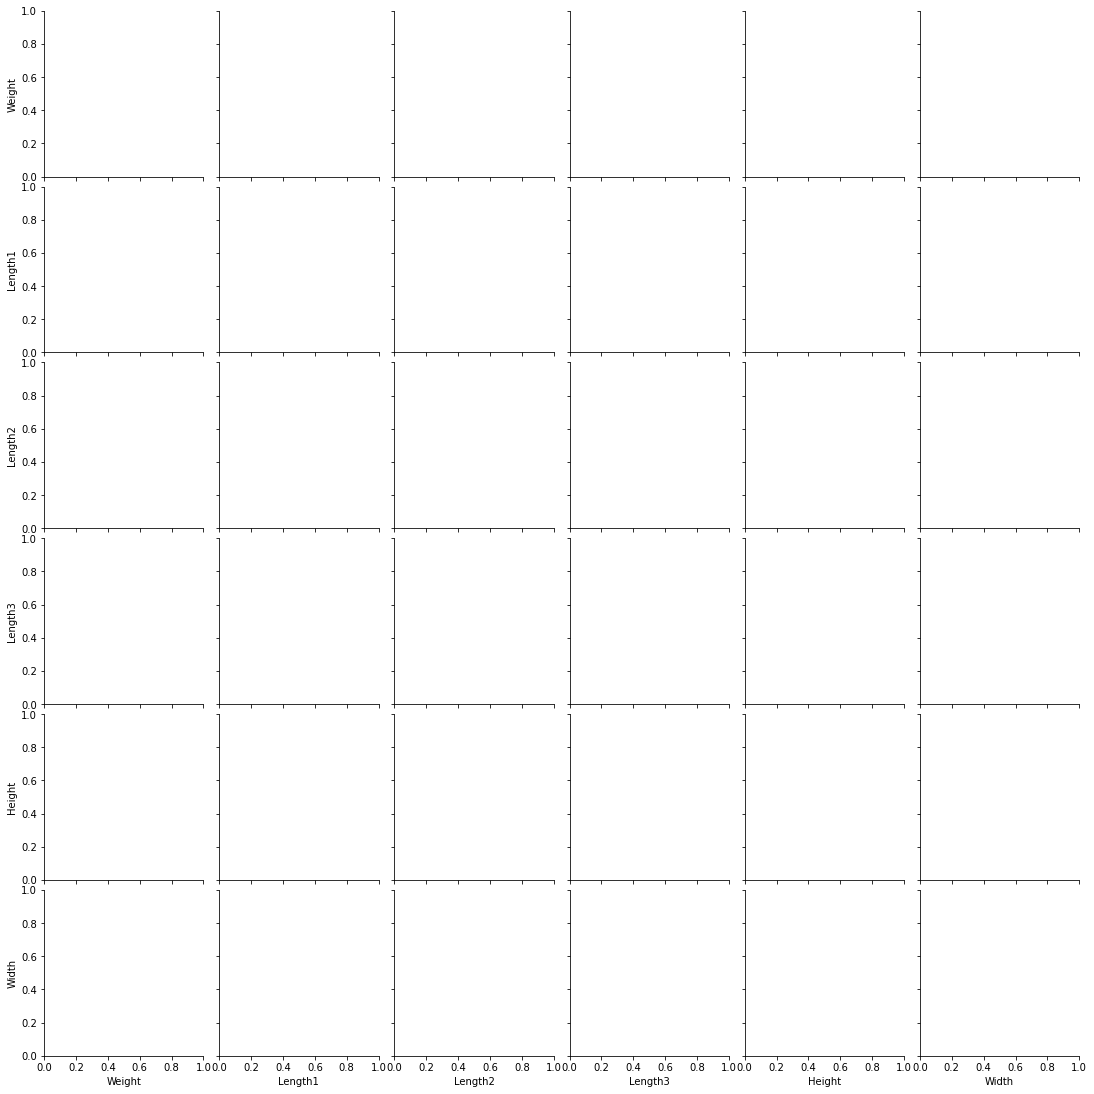

In [ ]:
#sns.pairplot(iris)
#sns.pairplot(iris)
sns.pairplot(d, hue="Species", palette="husl", markers=["o"])

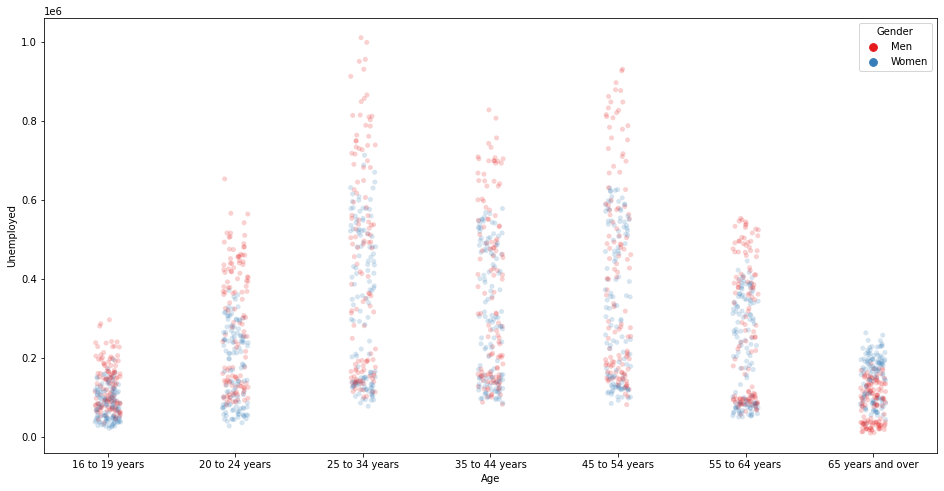

In [ ]:
plt.figure(figsize=(16,8))
sns.stripplot(x=f.Age,palette="Set1",y=f.Unemployed,jitter=True,hue=f.Gender,alpha=0.2)
plt.show()

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


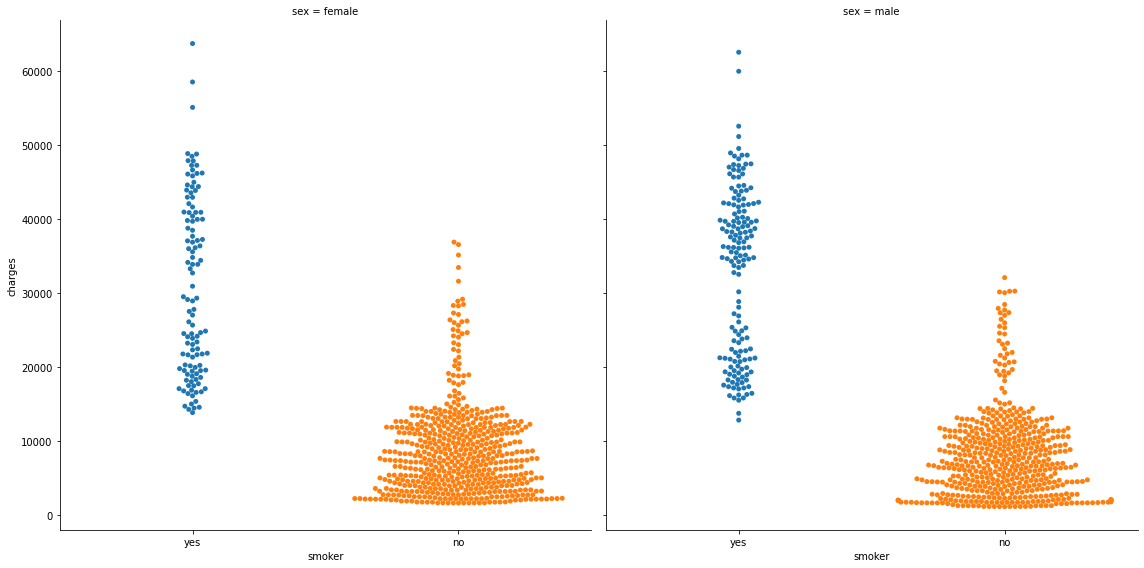

In [ ]:
sns.catplot(x="smoker",y="charges",col="sex",data=t,kind="swarm",height=8,aspect=1)
plt.show()

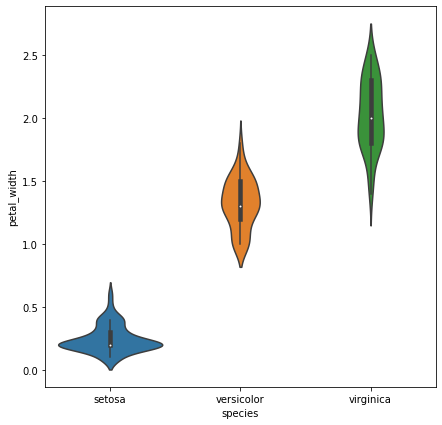

In [ ]:
plt.figure(figsize=(7,7))
sns.violinplot(x="species",y="petal_width",data=iris)
plt.show()                                                #violin plot!!:)

In [ ]:
f=pd.read_excel('unemployment (1).xlsx')
f 

,Age,Gender,Period,Unemployed
0,16 to 19 years,Men,2005-01-01,91000
1,20 to 24 years,Men,2005-01-01,175000
2,25 to 34 years,Men,2005-01-01,194000
3,35 to 44 years,Men,2005-01-01,201000
4,45 to 54 years,Men,2005-01-01,207000
...,...,...,...,...
1703,25 to 34 years,Women,2015-02-01,294000
1704,35 to 44 years,Women,2015-02-01,235000
1705,45 to 54 years,Women,2015-02-01,253000
1706,55 to 64 years,Women,2015-02-01,170000


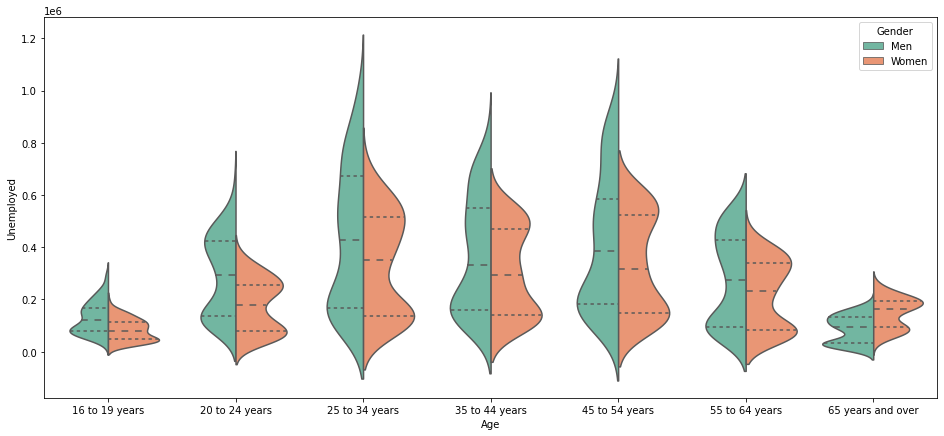

In [ ]:
plt.figure(figsize=(16,7))
sns.violinplot(x=f.Age,y=f.Unemployed,hue=f.Gender,palette="Set2",split=True,inner="quartile")
plt.show()

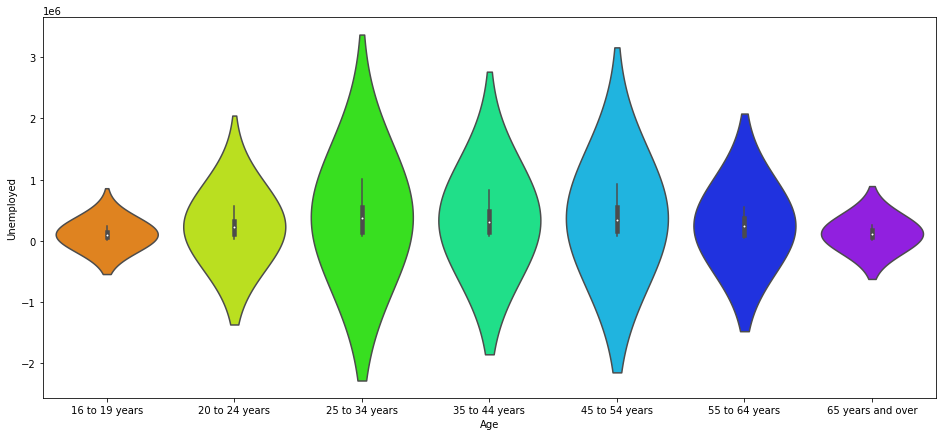

In [ ]:
plt.figure(figsize=(16,7))
sns.violinplot(x=f.Age,y=f.Unemployed,palette='gist_rainbow',scale='count',bw=5)
plt.show()